In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.DataFrame(load_digits()['data'])

In [3]:
target = pd.Series(load_digits()['target'])

In [4]:
target_names = pd.Series(load_digits()['target_names'])

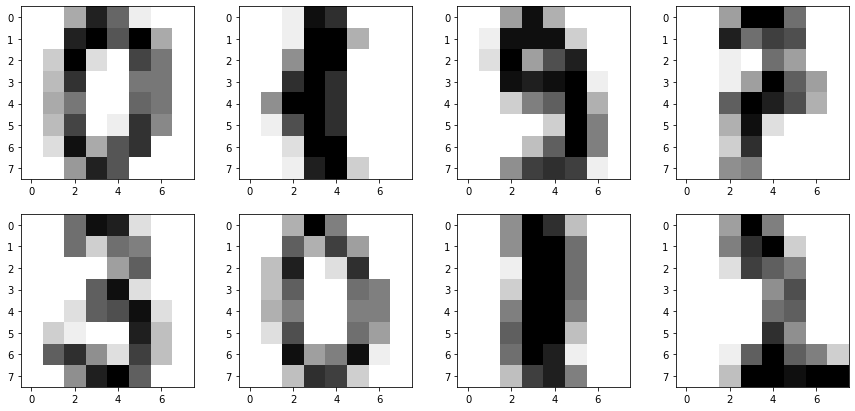

In [5]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(241)
ax2 = fig.add_subplot(242)
ax3 = fig.add_subplot(243)
ax4 = fig.add_subplot(244)
ax5 = fig.add_subplot(245)
ax6 = fig.add_subplot(246)
ax7 = fig.add_subplot(247)
ax8 = fig.add_subplot(248)

ax1.imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
ax2.imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
ax3.imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
ax4.imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')
ax5.imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
ax6.imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
ax7.imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
ax8.imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

# Testing K-Nearest Neighbors

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [7]:
#splits the data into training and testing sets
train_features, train_target = data.sample(int(len(data)*0.8), random_state=1), target.sample(int(len(target)*0.8), random_state=1)
test_features, test_target = data[~data.isin(train_features)].dropna(), target[~target.isin(train_target)].dropna()

In [8]:
#trains KNN models
def train_knn(neighbors, train_features, train_target):
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(train_features, train_target)
    return knn

In [9]:
#tests models
def test(test_features, test_target, model):
    predictions = model.predict(test_features)
    return accuracy_score(test_target, predictions)

In [10]:
#cross-validates models
def cross_validate_knn(folds, neighbors):
    kf = KFold(n_splits = folds, random_state = 1)
    accuracies = []
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]
        model = train_knn(neighbors, train_features, train_target)
        accuracy = test(test_features, test_target, model)
        accuracies.append(accuracy)
    return accuracies

# neighbors: 1
accuracy: 0.9760707635009311
# neighbors: 2
accuracy: 0.9760769708255742
# neighbors: 3
accuracy: 0.9771880819366853
# neighbors: 4
accuracy: 0.9732929857231533
# neighbors: 5
accuracy: 0.9738485412787089
# neighbors: 6
accuracy: 0.9705058969584108
# neighbors: 7
accuracy: 0.9693978895096214
# neighbors: 8
accuracy: 0.9682836747361886
# neighbors: 9
accuracy: 0.9666108007448789
# neighbors: 10
accuracy: 0.9660521415270018


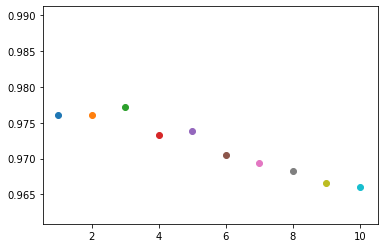

In [11]:
for x in range(1,11):
    accuracy = np.mean(cross_validate_knn(10, x))
    neighbors = x
    plt.scatter(neighbors, accuracy)
    print('# neighbors: ' + str(neighbors))
    print('accuracy: ' + str(accuracy))

We get our highest accuracy (.977) using the 3-nearest neighbors. As we increase from there, accuracy decreases.

# Testing Single-Layer Neural Networks

In [12]:
from sklearn.neural_network import MLPClassifier

In [13]:
def train_mlp(neurons, train_features, train_target):
    mlp = MLPClassifier(hidden_layer_sizes = (neurons,), random_state = 1)
    mlp.fit(train_features, train_target)
    return mlp

In [14]:
def cross_validate_mlp(folds, neurons):
    kf = KFold(n_splits = folds, random_state = 1)
    accuracies = []
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]
        model = train_mlp(neurons, train_features, train_target)
        accuracy = test(test_features, test_target, model)
        accuracies.append(accuracy)
    return accuracies

/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimizati

# neurons: 8
accuracy: 0.8079639975170702


/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimizati

# neurons: 16
accuracy: 0.9287709497206702


/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimizati

# neurons: 32
accuracy: 0.9376691495965238
# neurons: 64
accuracy: 0.9482309124767225
# neurons: 128
accuracy: 0.9549068901303537
# neurons: 256
accuracy: 0.958814400993172


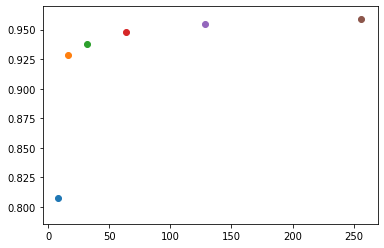

In [15]:
for x in [8,16,32,64,128,256]:
    accuracy = np.mean(cross_validate_mlp(10, x))
    neurons = x
    plt.scatter(neurons, accuracy)
    print('# neurons: ' + str(neurons))
    print('accuracy: ' + str(accuracy))

While accuracy did increase as we made a larger and larger neuronal layer, it plateaued at around 95%, which is still lower than the 97% accuracy we found with our 3-nearest neighbors algorithm. 

In [16]:
def check_fit(folds, neurons):
    kf = KFold(n_splits = folds, random_state = 1)
    accuracies = []
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]
        model = train_mlp(neurons, train_features, train_target)
        accuracy = test(train_features, train_target, model)
        accuracies.append(accuracy)
    return accuracies

/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimizati

/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimizati

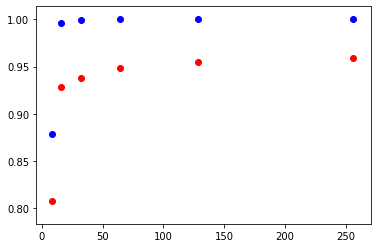

In [17]:
for x in [8,16,32,64,128,256]:
    accuracy = np.mean(cross_validate_mlp(10, x))
    neurons = x
    plt.scatter(neurons, accuracy, c='red')
    within_model_acc = np.mean(check_fit(10, x))
    plt.scatter(neurons, within_model_acc, c='blue')

    

Our fit also gets better with more neurons in the layer, as the model's accuracy on the test data gets better and stays high on the training data. 

# Testing Multi-Layer Neural Networks

In [23]:
def train_mlp(neurons, train_features, train_target):
    mlp = MLPClassifier(hidden_layer_sizes = (neurons, neurons), random_state = 1)
    mlp.fit(train_features, train_target)
    return mlp

/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimizati

/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimizati

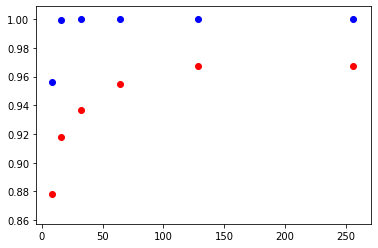

In [34]:
for x in [8,16,32,64,128,256]:
    accuracy = np.mean(cross_validate_mlp(10, x))
    neurons = x
    plt.scatter(neurons, accuracy, c='red')
    within_model_acc = np.mean(check_fit(10, x))
    plt.scatter(neurons, within_model_acc, c='blue')

In [35]:
def train_mlp(neurons, train_features, train_target):
    mlp = MLPClassifier(hidden_layer_sizes = (neurons, neurons, neurons), random_state = 1)
    mlp.fit(train_features, train_target)
    return mlp

/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimizati

/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/annahcasey/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimizati

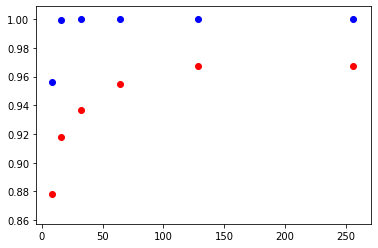

In [36]:
for x in [8,16,32,64,128,256]:
    accuracy = np.mean(cross_validate_mlp(10, x))
    neurons = x
    plt.scatter(neurons, accuracy, c='red')
    within_model_acc = np.mean(check_fit(10, x))
    plt.scatter(neurons, within_model_acc, c='blue')

With two- and three-layer neural networks, we see a slight improvement in accuracy, especially as the number of neurons in each layer increases. Given more layers and tweaking of the models, we would likely find our optimum model with even greater accuracy than our KNN model. 